<a href="https://colab.research.google.com/github/abhi4gupta/WNS-Assignments/blob/main/IIT2018187_LAB5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Wireless Networks - (iit2018187)(Abhishek Kumar Gupta)
 
 
##Lab 1: Building a Spectrum Analyzer using HackRF
In this lab we will be exploring the discrete Fourier transform which is one of the most important concepts in radio signal processing. We will also be working with real radio hardware to record radio signals and to understand some of the quirks of radio hardware. Finally, we'll implement a simple spectrograph which is a tool that's commonly used to visualize signals in both frequency and time.
 
Beyond introducing these three concepts, the goal of this lab is to develop an understanding of the lowest "layer" of wireless communication - the "physical" layer. By the end of this lab, you should be able to answer:
 
* What is a radio "signal"? How is a radio signal represented in the digital domain?
* What is the wireless "spectrum"?
* What does it mean for a signal to have high bandwidth?

##Answers

1. The radio signal is an electronic current moving back and forth very quickly. A transmitter radiates this field outward via an antenna; a receiver then picks up the field and translates it to the sounds heard through the radio.

2. To create a digital signal, an analog signal must be modulated with a control signal to produce it. The simplest modulation, a type of unipolar encoding, is simply to switch on and off a DC signal so that high voltages represent a '1' and low voltages are '0'.
In digital radio schemes one or more carrier waves are amplitude, frequency or phase modulated by the control signal to produce a digital signal suitable for transmission.
3. The bandwidth of a signal is defined as the difference between the upper and lower frequencies of a signal generated. As seen from the above representation, Bandwidth (B) of the signal is equal to the difference between the higher or upper-frequency (fH) and the lower frequency (fL).

In [ ]:
pip install SimpleSoapy

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [ ]:
%matplotlib inline

import math

from IPython.display import HTML
from matplotlib import animation, pyplot, rc
import numpy


#Part 0: The Discrete Fourier Transform
Consider the equation for the DFT of a signal  x  of length  N 
X[k]=∑n=0N−1x[n]e−i2πknN
 
In the above equation,  X  is also length  N  and the value at index  k  is the frequency component of  x  at normalized frequency  2πkN  radians per sample. Each element of  X  is the result of multiplying the signal  x  by a tone (a signal with only one frequency component) at the appropriate frequency, then summing the result. It's remarkable that the DFT is invertible; to go from  X  to  x  simply apply the same transformation except with a positive exponential instead of the negative. This is the "Inverse Discrete Fourier Transform" (IDFT).

#Problem 0.1 Implementing the DFT (10 pts)
Implement the DFT on your own using the above equation (let  k  range from 0 to  N−1 ). Compare against numpy's version on a random signal. Use the below cell for your code and testing.

In [ ]:
import numpy as np
import cmath
def dft(signal):
  n=len(signal)
  output=[]
  for k in range(n):
    s=complex(0)
    for t in range(n):
      angle=(2j*cmath.pi*t*k)/n
      s+=signal[t]*cmath.exp(-angle)
    output.append(s)
  return output


In [ ]:
# random complex sequence
signal = numpy.random.random(10) + 1j * numpy.random.random(10)
# Assert that your code matches numpy's version of the DFT
dftsignal=numpy.asarray(dft(signal))
print(dftsignal) 
print(numpy.fft.fft(signal))
numpy.testing.assert_almost_equal(dftsignal, numpy.fft.fft(signal))

[ 5.70033775+5.52181766j  2.02396818-2.46808595j -0.99534387-0.67493813j
  0.08393194-0.07388735j  0.06015498+0.03522393j -0.37421514+0.5973632j
  0.30197692+0.23784462j -0.04108782-0.75914946j  1.4004319 -0.71673555j
  0.05876892+1.17455609j]
[ 5.70033775+5.52181766j  2.02396818-2.46808595j -0.99534387-0.67493813j
  0.08393194-0.07388735j  0.06015498+0.03522393j -0.37421514+0.5973632j
  0.30197692+0.23784462j -0.04108782-0.75914946j  1.4004319 -0.71673555j
  0.05876892+1.17455609j]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


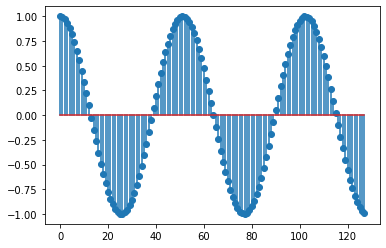

In [ ]:
signal = numpy.exp(1j * 2 * numpy.pi * (2.5 / 128) * numpy.arange(128))
#print(signal.real)
pyplot.figure()
pyplot.stem(signal.real) 
pyplot.show()

* a)  (4 pts)
Plot the DFT of this signal (the DFT is complex, just plot the magnitudes)

* b) (4 pts)
Double the length of the signal by adding zeros to the end of the signal. Plot the DFT of this "zero-padded" signal in a separate plot

* c) (2 pts)
The zero-padded DFT has twice as many points as the original. Which frequencies  k  in the zero-padded DFT are the same as those in the DFT of the original signal? You can use either your implementation of the DFT or numpy's.



What could you do if you wanted the component of an arbitrary frequency? One option is to zero-pad the signal until the chosen frequency shows up in the discrete spectrum, but this can be inefficent for some frequencies.
#Problem 0.3 Fine Frequency Adjustments (10 pts)
* Write a python function that calculates the frequency "bin" for an arbitrary frequency on a signal. Your function should pass all of the test cases below.

Your function get_freq_component should take a signal which is an array of complex values and a frequency index  k  which will be a floating point number, and it should return a complex value. Hint: consider what would happen if the value of  k  in the definition of the DFT is not an integer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


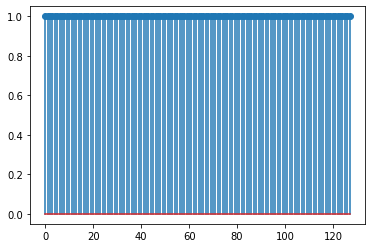

In [ ]:
#plotting DFT
dftsignal = numpy.asarray(dft(signal))
# print(dftsignal)
pyplot.figure()
pyplot.stem(dftsignal.real) 
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


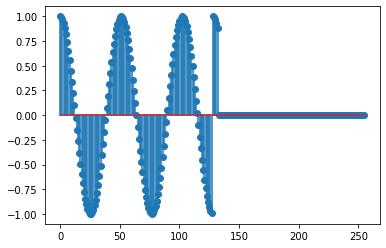

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()


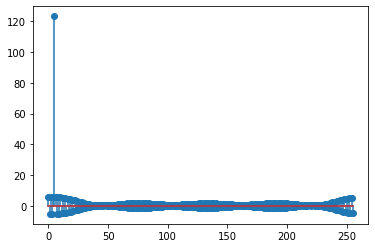

In [ ]:
##adding the padding...
# print(signal)
signal = numpy.exp(1j * 2 * numpy.pi * (2.5 / 128) * numpy.arange(128))
signalt=numpy.exp(1j * 2 * numpy.pi * (2.5 / 128) * numpy.arange(128))
# print(signal)
for i in range(5,len(signalt)):
  signalt[i]=0+1j*0
padsignal=numpy.append(signal,signalt)
#print(signal)
#print(padsignal)
dftpadsignal=numpy.asarray(dft(padsignal))
pyplot.figure()
pyplot.stem(padsignal.real) 
pyplot.show()
pyplot.figure()
pyplot.stem(dftpadsignal.real) 
pyplot.show()


In [ ]:
#The zero-padded DFT has twice as many points as the original. Which frequencies k in the zero-padded DFT are the same as those in the DFT of the original signal?
ans=[]
for i in range(len(signal)):
  if dftsignal[i].real==dftpadsignal[i].real:
    ans.append(i)
print(ans)

[]


#Problem 0.3 Fine Frequency Adjustments (10 pts)
* Write a python function that calculates the frequency "bin" for an arbitrary frequency on a signal. Your function should pass all of the test cases below.

Your function get_freq_component should take a signal which is an array of complex values and a frequency index  k  which will be a floating point number, and it should return a complex value. Hint: consider what would happen if the value of  k  in the definition of the DFT is not an integer.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


(-5.0, 110.0)

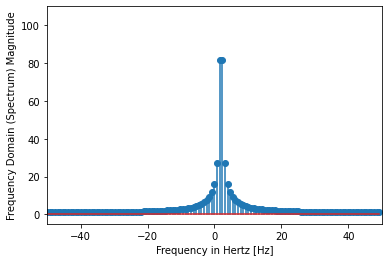

In [ ]:
from scipy import fftpack
f_s = 100
X = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal)) * f_s

fig, ax = pyplot.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

#Problem 0.4 Low-Pass Filtering with the DFT (10 pts)
Now, we will implement a low-pass filter using the DFT. A low-pass filter is a filter that takes a signal and removes (or significantly attenuates) the high frequencies, leaving behind the lower frequency components. Below is an example of a low-passed signal.

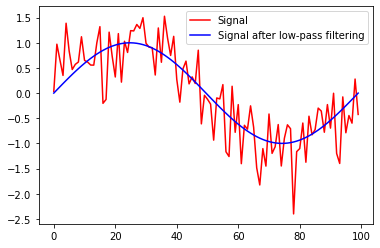

In [ ]:
x = numpy.linspace(0, 2 * numpy.pi, 100)
lpf_signal = numpy.sin(x)
signal = lpf_signal + numpy.random.normal(size=len(lpf_signal), scale=0.5)

pyplot.figure()
pyplot.plot(signal, 'red', label='Signal')
pyplot.plot(lpf_signal, 'blue', label='Signal after low-pass filtering')
pyplot.legend()
pyplot.show()

Consider the random signal below. Take the DFT of this signal, then zero-out the higher half of the frequencies. The high frequencies are considered those greater than  B/4  and less than  −B/4  (we want to remove large negative frequencies as well). Be careful to remove the right frequencies. Then use the inverse DFT to recover the filtered time-domain signal.

* Plot the original signal and the signal after the low-pass filter (you can plot just the real component of both signals).

Note that in practice, this isn't a great low-pass filter. You can read more here if you're curious why this approach is suboptimal.

In [ ]:
signal_len = 64
signal = numpy.random.random(signal_len) + 1j * numpy.random.random(signal_len)

-0.5 0.484375


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


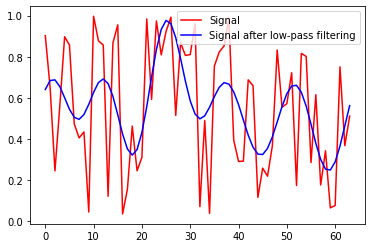

In [ ]:
X = fftpack.fft(signal)
freqs = fftpack.fftfreq(len(signal))
print(min(freqs),max(freqs))
for i in range(len(freqs)):
  if freqs[i]>=0.1 or freqs[i]<=-0.1:
    X[i]=0+1j*0
lpf_signal=fftpack.ifft(X)
pyplot.figure()
pyplot.plot(signal, 'red', label='Signal')
pyplot.plot(lpf_signal, 'blue', label='Signal after low-pass filtering')
pyplot.legend()
pyplot.show()

#Part 1: Interfacing with the HackRF radio
The HackRF is a low-cost software-defined radio (SDR). We use the term "software-defined" to distinguish from the more typical hardware radios found in things like cell phones where radio parameters like center frequency, sample rate (bandwidth), gain, and analog filters are all set in hardware. For SDRs, these parameters can vary over a wide range and can be set in software. So SDRs are more flexible than typical radio hardware, but they are more expensive and draw more power.

Nearly all modern digital radios (software-defined or not) will deal with complex digital samples. These samples are sometimes called "in-phase and quadrature" samples or simply I/Q samples ("in-phase" refers to the real part and "quadrature" refers to the imaginary part). The reason for using complex values has to do with hardware design which we won't go into in this course, but it is also mathematically convenient (consider the definition of the DFT uses complex values).

##Problem 1.1 Tuning in on the airwaves (10 pts):
* Using the API below, tune your HackRF hardware to a center frequency of 1250MHz at a bandwidth of 5MHz and capture 1M samples. Plot the samples in the time domain and the frequency domain (i.e. after applying the DFT).

Plot the real and imaginary components of the time signal separately (on the same plot), and plot the magnitude of the spectrum (with a logarithmic scale).

Use the Radio class provided below. Software radios usually do buffered I/O, meaning samples are buffered in the radio hardware and then the whole buffer is sent to the computer. This is instead of sending one sample at a time to the computer, which would be inefficient. So you'll need to grab samples in chunks of the buffer size and store them in memory. The buffer size for the HackRF is 131072 samples, and is set in hardware so it cannot be changed. You may grab samples from the HackRF in chunk sizes up to and including the buffer size.

In [ ]:
!apt update
!apt install -y cmake
!pip install dlib

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InReleas

In [ ]:
!sudo git clone https://github.com/pothosware/SoapySDR.git

In [ ]:
cd /content/

In [ ]:
!git pull origin master

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
fatal: Unable to read current working directory: No such file or directory


In [ ]:
mkdir build


mkdir: cannot create directory ‘build’: File exists


In [ ]:
cd build

/content/SoapySDR/build


In [ ]:
!cmake ..

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Build type not specified: defaulting to release.
-- Could NOT find Doxygen (missing: DOXYGEN_EXECUTABLE) 
-- 
-- #############################################
-- ## Begin configuration for Python support...
-- #############################################
-- Enabling optional Python bindings if possible...
-- Could NOT find SWIG (missing: SWIG_EXECUTABLE SWIG_DIR) 
-- SWIG_FOUND: FALSE - 
-- Found Py

In [ ]:
!make -j4

Scanning dependencies of target SoapySDR
[  2%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Device.cpp.o
[  5%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Types.cpp.o
[  8%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Factory.cpp.o
[ 11%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Registry.cpp.o
[ 14%] Building CXX object lib/CMakeFiles/SoapySDR.dir/NullDevice.cpp.o
[ 17%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Logger.cpp.o
[ 20%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Errors.cpp.o
[ 22%] Building CXX object lib/CMakeFiles/SoapySDR.dir/Formats.cpp.o
[ 25%] Building CXX object lib/CMakeFiles/SoapySDR.dir/ConverterRegistry.cpp.o
[ 28%] Building CXX object lib/CMakeFiles/SoapySDR.dir/DefaultConverters.cpp.o
[ 31%] Building CXX object lib/CMakeFiles/SoapySDR.dir/TypesC.cpp.o
[ 34%] Building CXX object lib/CMakeFiles/SoapySDR.dir/ModulesC.cpp.o
[ 37%] Building CXX object lib/CMakeFiles/SoapySDR.dir/VersionC.cpp.o
[ 40%] Building CXX object lib/CMakeFiles/

In [ ]:
!sudo make install

[ 65%] Built target SoapySDR
[ 77%] Built target SoapySDRUtil
[ 82%] Built target TestTimeConversion
[ 88%] Built target TestConvertTypes
[ 94%] Built target TestFormatParser
[100%] Built target TestKwargsMarkup
Install the project...
-- Install configuration: "Release"
-- Up-to-date: /usr/local/share/cmake/SoapySDR/SoapySDRConfig.cmake
-- Up-to-date: /usr/local/share/cmake/SoapySDR/SoapySDRUtil.cmake
-- Up-to-date: /usr/local/share/cmake/SoapySDR/SoapySDRConfigVersion.cmake
-- Up-to-date: /usr/local/include/SoapySDR
-- Up-to-date: /usr/local/include/SoapySDR/Formats.hpp
-- Up-to-date: /usr/local/include/SoapySDR/Config.hpp
-- Up-to-date: /usr/local/include/SoapySDR/Modules.h
-- Up-to-date: /usr/local/include/SoapySDR/Types.hpp
-- Up-to-date: /usr/local/include/SoapySDR/Device.h
-- Up-to-date: /usr/local/include/SoapySDR/Version.h
-- Up-to-date: /usr/local/include/SoapySDR/Modules.hpp
-- Up-to-date: /usr/local/include/SoapySDR/Logger.hpp
-- Up-to-date: /usr/local/include/SoapySDR/Time.

In [ ]:
!sudo ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [ ]:
!SoapySDRUtil --info

######################################################
##     Soapy SDR -- the SDR abstraction library     ##
######################################################

Lib Version: v0.8.0-g351896d3
API Version: v0.8.0
ABI Version: v0.8
Install root: /usr/local
Search path:  /usr/local/lib/SoapySDR/modules0.8 (missing)
No modules found!
Available factories... No factories found!
Available converters...
 -  CF32 -> [CF32, CS16, CS8, CU16, CU8]
 -  CS16 -> [CF32, CS16, CS8, CU16, CU8]
 -  CS32 -> [CS32]
 -   CS8 -> [CF32, CS16, CS8, CU16, CU8]
 -  CU16 -> [CF32, CS16, CS8]
 -   CU8 -> [CF32, CS16, CS8]
 -   F32 -> [F32, S16, S8, U16, U8]
 -   S16 -> [F32, S16, S8, U16, U8]
 -   S32 -> [S32]
 -    S8 -> [F32, S16, S8, U16, U8]
 -   U16 -> [F32, S16, S8]
 -    U8 -> [F32, S16, S8]


In [ ]:
import SoapySDR
from SoapySDR import SOAPY_SDR_RX, SOAPY_SDR_CF32

In [ ]:
class Radio:
    def __init__(self, *args, **kwargs):
        self.sdr = SoapySDR.Device(*args, **kwargs)

    def set_sample_rate(self, sample_rate_hz):
        self.sdr.setSampleRate(SOAPY_SDR_RX, 0, sample_rate_hz)

    def set_center_frequency(self, freq_hz):
        self.sdr.setFrequency(SOAPY_SDR_RX, 0, freq_hz)

    def start_receive(self):
        self.rx_stream = self.sdr.setupStream(SOAPY_SDR_RX, SOAPY_SDR_CF32)
        self.sdr.activateStream(self.rx_stream)

    def stop_receive(self):
        self.sdr.deactivateStream(self.rx_stream)
        self.sdr.closeStream(self.rx_stream)
        self.rx_stream = None

    def grab_samples(self, rx_buff):
        if self.rx_stream is None:
            raise RuntimeError("Need to start receiving before grabbing samples")

        if len(rx_buff) > self.get_buffer_size():
            raise RuntimeError("Number of samples cannot be more than the buffer size")

        resp = self.sdr.readStream(self.rx_stream, [rx_buff], numElems=len(rx_buff))
        if resp.ret != len(rx_buff):
            raise RuntimeError('Receive failed: {}'.format(SoapySDR.errToStr(resp.ret)))

    def get_buffer_size(self):
        return 131072
rad=Radio()
rad.set_center_frequency(freq_hz=1250000000)
rad.set_sample_rate(sample_rate_hz=5000000)
rad.start_receive()
rad.grab_samples( rx_buff=samples_list)
rad.stop_receive()

N=1000000
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
fig, ax = plt.subplots()
ax.plot(x, samples_list)
plt.show()

fig, ax = plt.subplots()
ax.plot(xf, numpy.fft.fft(sample_list))
plt.show()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


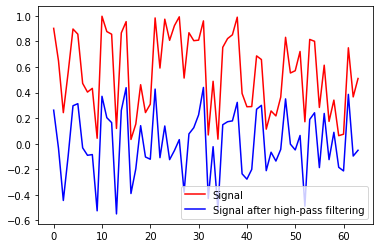

In [ ]:
#Perform high pass filtering of the signal to remove the DC offset

highpass_signal = signal - lpf_signal
pyplot.figure()
pyplot.plot(signal, 'red', label='Signal')
pyplot.plot(highpass_signal, 'blue', label='Signal after high-pass filtering')
pyplot.legend()
pyplot.show()


#Part 2: Fine-tuning Your Reception
Both transmitters and receivers can have different gains. A transmitter's gain determines how loud the signal is over-the-air, and a receiver's gain determines how much a signal is amplified before being digitally sampled. The receive gain is important to get right because it determines the dynamic range of the analog-to-digital converter (ADC). For example, an 8-bit ADC has values between 0 and 255. The dynamic range is the voltage difference between the value of 0 and the value of 255. If the receive gain is too low, then the signal may be lost in the noise, but if the receive gain is too high, then all of your signal will have value close to 255 which will cause distortion. This distortion is known as "clipping," and is demonstrated below.



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


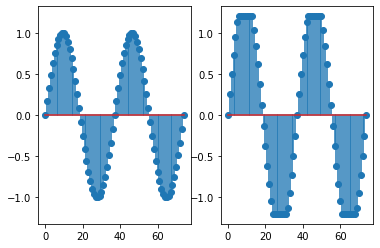

In [ ]:
# Simulated example of the clipping effect
x = numpy.linspace(0, 4 * numpy.pi, 75)
normal_sine = numpy.sin(x)
high_gain_sine = 1.5 * normal_sine
pyplot.figure()
ax1 = pyplot.subplot(1, 2, 1)
pyplot.stem(numpy.clip(normal_sine, -1.2, 1.2))
pyplot.subplot(1, 2, 2, sharey=ax1)
pyplot.stem(numpy.clip(high_gain_sine, -1.2, 1.2))
pyplot.show()

In [ ]:
def set_gain(radio, maximum):
    radio.sdr.setGainMode(SoapySDR.SOAPY_SDR_RX, 0, automatic=False)
    for gain in radio.sdr.listGains(SoapySDR.SOAPY_SDR_RX, 0):
        gain_range = radio.sdr.getGainRange(SoapySDR.SOAPY_SDR_RX, 0, gain)
        print(f'RX {gain}: {gain_range}')
        radio.sdr.setGain(SoapySDR.SOAPY_SDR_RX, 0, gain, gain_range.maximum() if maximum else gain_range.minimum())
    from time import sleep
    sleep(1)
rad=Radio()
rad.set_center_frequency(freq_hz=1250000000)
rad.set_gain(radio, maximum=false)
rad.start_receive()
rad.grab_samples( rx_buff=samples_list)
rad.stop_receive()
rad.set_gain(radio, maximum=true)
rad.start_receive()
rad.grab_samples( rx_buff=samples_list)
rad.stop_receive()
